In [1]:
import sys
sys.path.insert(0, r"D:\gitdesktop\Qtrade\qlib")

import qlib
import pandas as pd
from qlib.constant import REG_CN
from qlib.utils import exists_qlib_data, init_instance_by_config
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord
from qlib.utils import flatten_dict
from qlib.tests.data import GetData
from qlib.data import D
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
provider_uri = r"D:\gitdesktop\Qtrade\cn_data"  # target_dir
GetData().qlib_data(target_dir=provider_uri, region=REG_CN, exists_skip=True)
qlib.init(provider_uri=provider_uri, region=REG_CN)

2025-07-14 13:02:10.280 | WARNING  | qlib.tests.data:qlib_data:195 - Data already exists: D:\gitdesktop\Qtrade\cn_data, the data download will be skipped
	If downloading is required: `exists_skip=False` or `change target_dir`
[4064:MainThread](2025-07-14 13:02:10,282) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[4064:MainThread](2025-07-14 13:02:10,288) INFO - qlib.Initialization - [__init__.py:75] - qlib successfully initialized based on client settings.
[4064:MainThread](2025-07-14 13:02:10,289) INFO - qlib.Initialization - [__init__.py:77] - data_path={'__DEFAULT_FREQ': WindowsPath('D:/gitdesktop/Qtrade/cn_data')}


In [11]:
import os
provider_stock_dir = r"D:\gitdesktop\Qtrade\cn_data"  # target_dir
feature_dir = os.path.join(provider_stock_dir, "features")
fields = [name for name in os.listdir(feature_dir) if os.path.isdir(os.path.join(feature_dir, name))]
print(fields)

['bj430017', 'bj430047', 'bj430090', 'bj430139', 'bj430198', 'bj430300', 'bj430418', 'bj430425', 'bj430476', 'bj430478', 'bj430489', 'bj430510', 'bj430556', 'bj430564', 'bj430685', 'bj430718', 'bj830779', 'bj830799', 'bj830809', 'bj830832', 'bj830839', 'bj830879', 'bj830896', 'bj830946', 'bj830964', 'bj830974', 'bj831010', 'bj831039', 'bj831087', 'bj831152', 'bj831167', 'bj831175', 'bj831195', 'bj831278', 'bj831304', 'bj831305', 'bj831370', 'bj831396', 'bj831445', 'bj831526', 'bj831627', 'bj831641', 'bj831689', 'bj831726', 'bj831768', 'bj831832', 'bj831834', 'bj831855', 'bj831856', 'bj831906', 'bj831961', 'bj832000', 'bj832023', 'bj832089', 'bj832110', 'bj832145', 'bj832149', 'bj832171', 'bj832175', 'bj832225', 'bj832278', 'bj832419', 'bj832469', 'bj832471', 'bj832491', 'bj832522', 'bj832566', 'bj832651', 'bj832662', 'bj832735', 'bj832786', 'bj832802', 'bj832876', 'bj832885', 'bj832978', 'bj832982', 'bj833030', 'bj833075', 'bj833171', 'bj833230', 'bj833266', 'bj833284', 'bj833346', 'bj

Auto detected date range: 2005-01-04 to 2025-07-04


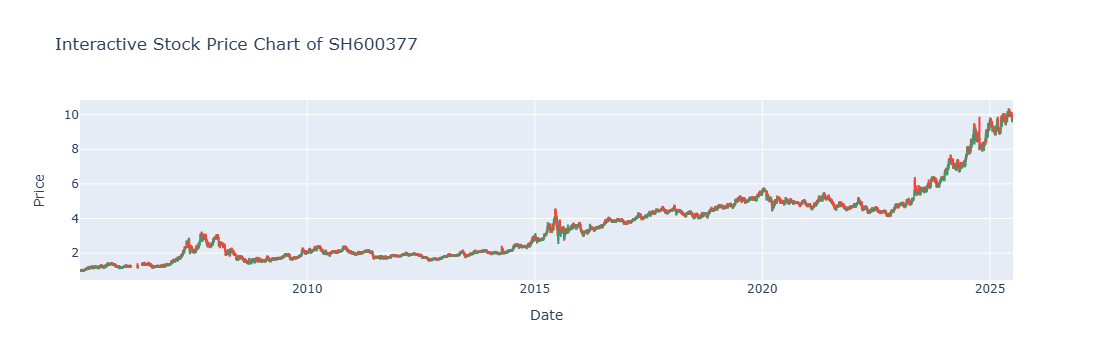

In [3]:
stock = ["SH600377"]

# 先获取这只股票的所有交易日期索引
# 这里我们取 close 价格字段的所有时间，作为时间索引
df_tmp = D.features(
    instruments=stock,
    fields=["$close"],
    start_time="2000-01-01",  # 这里写一个非常早的时间，目的是拿到所有数据
    end_time=datetime.datetime.today().strftime("%Y-%m-%d"),
)

# 获取该股票最早交易日期
start_date = df_tmp.loc[stock[0]].index.min().strftime("%Y-%m-%d")
end_date = df_tmp.loc[stock[0]].index.max().strftime("%Y-%m-%d")

print(f"Auto detected date range: {start_date} to {end_date}")

# 再次获取完整数据，从最早日期到今天
df = D.features(
    instruments=stock,
    fields=["$close", "$open", "$high", "$low", "$volume", "$adjclose"],
    start_time=start_date,
    end_time=end_date,
)

df_stock = df.loc[stock[0]]

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df_stock.index,
            open=df_stock["$open"],
            high=df_stock["$high"],
            low=df_stock["$low"],
            close=df_stock["$close"],
            name=stock[0],
        )
    ]
)

fig.update_layout(
    title=f"Interactive Stock Price Chart of {stock[0]}",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,
)

fig.show()

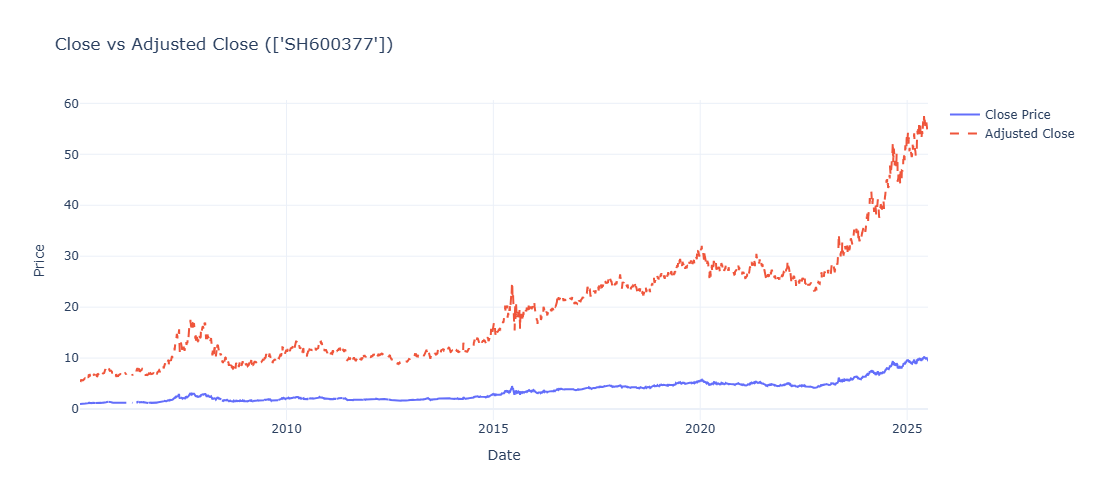

In [4]:
# 确保 df 是标准 DataFrame
if isinstance(df.index, pd.MultiIndex):
    df = df.reset_index()

# 确保 datetime 是索引并格式正确
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# 创建 Plotly 图像
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df["$close"],
    mode='lines',
    name='Close Price'
))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df["$adjclose"],
    mode='lines',
    name='Adjusted Close',
    line=dict(dash='dash')
))

fig.update_layout(
    title=f"Close vs Adjusted Close ({stock})",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode='x unified',
    template='plotly_white',
    height=500
)

fig.show()

1. 数据库中的数据是对的，但是下载下来的数据是复权过后的。
2. 如何下载下来对的数据是个问题。
3. 下载下来如何使用又是一个问题。
4. 需要在ubuntu系统中安装dolt,尝试进行下载正确数据，如果不行可能需要转到mysql，还得学习如何更新数据。
5. 或者那错误的结果尽量模拟出正确的决策，但是正确的结果可能不知道~。如果需要得到正确的结果可能更加麻烦。